In [1]:
#In this this exercise, you will implement the K-means algorithm and use it for image compression. 
#You will ﬁrst start on an example 2D dataset that will help you gain an intuition of how the K-means algorithm works. 
#After that, you wil use the K-means algorithm for image compression by reducing the number of colors that occur in an image
#to only those that are most common in that image

# 1.1 Implementing K-means

## 1.1.1 Finding closest centroids

In [2]:
#Importing...

import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D




#Reading the .mat file

mat_contents = sio.loadmat('E:\Machine Learning\Exercises\machine-learning-ex7\ex7\ex7data2.mat')

mat_contents

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Nov 16 00:48:22 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ 1.84207953,  4.6075716 ],
        [ 5.65858312,  4.79996405],
        [ 6.35257892,  3.2908545 ],
        [ 2.90401653,  4.61220411],
        [ 3.23197916,  4.93989405],
        [ 1.24792268,  4.93267846],
        [ 1.97619886,  4.43489674],
        [ 2.23454135,  5.05547168],
        [ 2.98340757,  4.84046406],
        [ 2.97970391,  4.80671081],
        [ 2.11496411,  5.37373587],
        [ 2.12169543,  5.20854212],
        [ 1.5143529 ,  4.77003303],
        [ 2.16979227,  5.27435354],
        [ 0.41852373,  4.88312522],
        [ 2.47053695,  4.80418944],
        [ 4.06069132,  4.99503862],
        [ 3.00708934,  4.67897758],
        [ 0.66632346,  4.87187949],
        [ 3.1621865 ,  4.83658301],
        [ 0.51155258,  4.91052923],
        [ 3.1342801 ,  4.96178114],
        [ 2.04974595,  5.6241395 ],
        [ 0.66582785,  5.243

In [3]:
# Select an initial set of centroids
K = 3; # 3 Centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])

In [4]:
# Extracting the training data

X = mat_contents['X']

X.shape

(300, 2)

### Centroid Assignment Step

In [5]:
# This function takes the data matrix X and the locations of all centroids inside centroids and should output a 
# one-dimensional array idx that holds the index (a value in {1,...,K}, where K is total number of centroids) 
# of the closest centroid to every training example. 
def findClosestCentroids(X,initial_centroids):
    
    #it will have the length of m
    idx = np.zeros((X.shape[0],initial_centroids.shape[0]))
    
    
    #METHOD 1 ( for this size of idx will be (X.shape[0],1))
    
    # Isme loop m tk chlega
    """Isme me each i'th training data ko initial_centroids(having shape (3,2)) me se minus kr rha hu mere ps shape (3,2 aygi)
       fir uske bd square kr rha hu then sum row wise ab shape hogyi (3,1 ya 1,3) (this was magnitude**2) then ab me (3,1) ka
       minimum element ka index nikalunga and that will be my closest centroid index for that i'th data
    """
    #for i in range(X.shape[0]):
        
        #idx[i] = np.argmin(((X[i] - initial_centroids)**2).sum(axis = 1)) + 1
    
    #return idx
     
    
    #METHOD 2 ( for this size of idx will be (X.shape[0],initial_centroids.shape[0])) 
    
    #upr vale method me loop m tk gya so to reduce the loop we done this 
    """Isme mene kya trick lgai puri X ko mene hr ek initial_centroids ki hr ek row se minus kia then uska sum nikala row wise
        thik hai ek iteration me mere pas 300,1 ka aya fir esi kia upto k so after loop i have 300,3 ab row wise mene minimum
        element ka index nikala finally i have the required result"""
    
    for i in range(initial_centroids.shape[0]):
        idx[:,i] = ((X - initial_centroids[i])**2).sum(axis = 1)
    
    return idx.argmin(axis = 1) + 1
    

In [6]:
# Find the closest centroids for the examples using the
# initial_centroids
idx = findClosestCentroids(X, initial_centroids)

idx

array([1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1], d

## 1.1.2 Computing centroid means

In [7]:
# Concretely, if two examples say x3 and x5 are assigned to centroid k = 2, then you should update µ2 = 1/2(x3 + x5) 
def computeCentroids(X, idx, K):
    
    mu_K = np.zeros((K,X.shape[1]))
    
    for i in range(K):
        
        # no. of elments assigned to the ith cluster
        C_k = len(np.where(idx==i+1)[0]) # i+1 is done here because cluster startingf from 1
        
        #finding mean of the ith cluster and assigning it to the ith centroid
        mu_K[i] = (X[np.where(idx == i+1)[0]]).sum(axis = 0)/C_k
     
    return mu_K

In [8]:
print((X[np.where(idx==1)[0]]).sum(axis = 0))

[463.80551241 603.16351773]


In [9]:
# Compute means based on the closest centroids found in the previous part.
centroids = computeCentroids(X, idx, K);

print(centroids)

[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


## 1.2 K-means on example dataset

In [10]:
# =================== Part 3: K-Means Clustering ======================
#  After you have completed the two functions computeCentroids and
#  findClosestCentroids, you have all the necessary pieces to run the
#  kMeans algorithm. In this part, you will run the K-Means algorithm on
#  the example dataset we have provided.

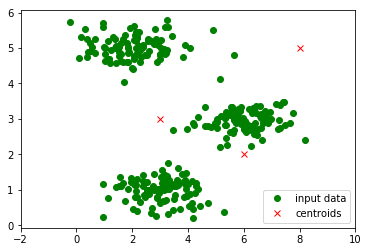

In [11]:
# Visualizing my data and the centroids

plt.plot(X[:,0],X[:,1],'go',label = 'input data')
plt.plot(initial_centroids[:,0],initial_centroids[:,1],'rx',label = 'centroids')
plt.xlim(-2,10)
plt.legend()

In [12]:
#% Settings for running K-Means
K = 3
max_iters = 10

#% For consistency, here we set centroids to specific values
#% but in practice you want to generate them automatically, such as by
#% settings them to be random examples (as can be seen in
#% kMeansInitCentroids).
initial_centroids = np.array([[3,3],[6,2],[8,5]])



In [13]:
def runKMeans(X, initial_centroids, max_iters,plot_progress):
    
    #Initialize values
    
    m,n = X.shape # storing the training examples and no. of features
    
    K = initial_centroids.shape[0] # no. of rows of initial_centroids will be the value of K
    
    # it will store all the centroids therefore it will be a 3D array indicating ith index as
    # centroids obtained at ith iteration
    centroids = np.zeros((max_iters+1,K,n))
    
    # storing at 0th index our initial_centroids
    centroids[0] = initial_centroids
    
    idx = np.zeros((m,1))
    
    plt.figure(figsize=(9,7))
    for i in range(max_iters):
        idx = findClosestCentroids(X,centroids[i].reshape(K,n))
        
        centroids[i + 1] = computeCentroids(X,idx,K)

    if plot_progress:
        #coloring for the last iteration
        for i in range(K):
            plt.plot(X[np.where(idx == i + 1)][:,0],X[np.where(idx == i + 1)][:,1],'o',label = 'input data')

        plt.plot(centroids[:,:,0],centroids[:,:,1],'black',marker = '*',label = 'centroids')
        plt.plot(centroids[:,:,0],centroids[:,:,1],label = 'line')
    

    
    # returning the last centroid obtained and the idx specifying the cluster of each example
    return centroids[max_iters:,:].reshape(K,n) , idx

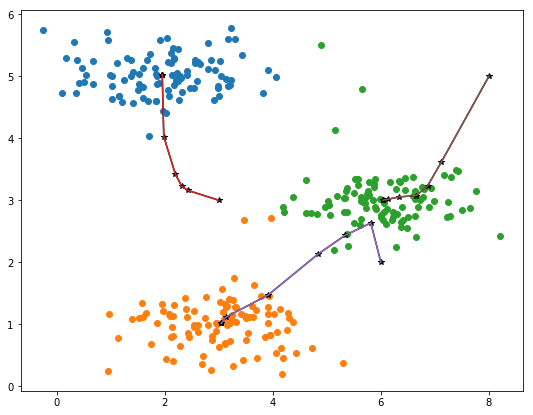

In [14]:
""" Runs the K-Means algorithm on data matrix X, where each row of X is a single example. It uses initial_centroids used as 
the initial centroids. max_iters specifies the total number of interactions of K-Means to execute. plot_progress is a 
true/false flag that indicates if the function should also plot its progress as the learning happens.runkMeans returns 
centroids, a Kxn matrix of the computed centroids and idx, a (m x 1) vector of centroid assignments (i.e. each entry in range [1..K])"""

# Run K-Means algorithm. The 'True' at the end tells our function to plot the progress of K-Means
centroids, idx = runKMeans(X, initial_centroids, max_iters, True)

## 1.3 Random initialization

In [15]:
a = np.random.permutation(10)
print(a[a[0:4]])

[4 8 5 7]


In [16]:
#% Initialize the centroids to be random examples
def kMeansInitCentroids(X,K):
    # Randomly reorder the indices of examples 
    randidx = np.random.permutation(X.shape[0]) # m = X.shape[0]

    #% Take the first K examples as centroids 
    centroids = X[randidx[0:K]]
    
    return centroids

In [17]:
print('Randomly initialized centroids are: \n',kMeansInitCentroids(X,K))


Randomly initialized centroids are: 
 [[5.132009   2.19812195]
 [5.6673103  2.96477867]
 [2.95818429 1.01887096]]


## Image compression with K-means

In [18]:
#In24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers (ranging from 0-255) 
#that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding. Our image 
#contains thousands of colors, and in this part of the exercise, you will reduce the number of colors to 16 colors. 

In [19]:
# By making this reduction, it is possible to represent (compress) the photo in an eﬃcient way. Speciﬁcally, you only need to 
# store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the 
# color at that location (where only 4 bits are necessary to represent 16 possibilities).

In [20]:
# In this exercise, you will use the K-means algorithm to select the 16 colors that will be used to represent the compressed 
# image. Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to ﬁnd 
# the 16 colors that best group (cluster) the pixels in the 3dimensional RGB space. Once you have computed the cluster 
# centroids on the image, you will then use the 16 colors to replace the pixels in the original image.


In [21]:
#%% ============= Part 4: K-Means Clustering on Pixels ===============
#%  In this exercise, you will use K-Means to compress an image. To do this,
#%  you will first run K-Means on the colors of the pixels in the image and
#%  then you will map each pixel onto its closest centroid.

### 1.4.1 K-means on pixels


(1200, 1600, 3)
[[[ 97 102 193]
  [ 96 101 192]
  [ 94  99 190]
  ...
  [249 242 223]
  [249 242 223]
  [249 242 223]]

 [[102 107 198]
  [ 98 103 194]
  [100 105 196]
  ...
  [249 242 223]
  [249 242 223]
  [249 242 223]]

 [[ 98 103 194]
  [ 94  98 189]
  [100 104 195]
  ...
  [249 242 223]
  [249 242 223]
  [249 242 223]]

 ...

 [[ 86  67 133]
  [ 86  67 133]
  [ 88  69 135]
  ...
  [ 68  70  95]
  [ 80  85 107]
  [ 87  92 114]]

 [[ 88  65 133]
  [ 89  66 134]
  [ 86  65 132]
  ...
  [ 53  55  80]
  [ 76  78 101]
  [ 73  75  98]]

 [[ 89  64 132]
  [ 90  67 135]
  [ 89  66 134]
  ...
  [ 42  44  69]
  [ 51  53  76]
  [ 73  75  98]]]


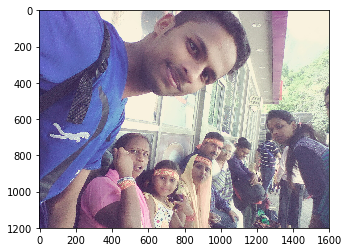

In [22]:
# Load 128x128 color image (bird small.png)
import imageio

#This creates a three-dimensional matrix A whose ﬁrst two indices identify a pixel position and whose last index represents 
#red, green, or blue.
img = imageio.imread(r'E:\Machine Learning\test.jpg')
print(img.shape)
print(img)
plt.imshow(img)

In [23]:
#Divide by 255 so that all values are in the range 0 - 1
img = img / 255

img

Image([[[0.38039216, 0.4       , 0.75686275],
        [0.37647059, 0.39607843, 0.75294118],
        [0.36862745, 0.38823529, 0.74509804],
        ...,
        [0.97647059, 0.94901961, 0.8745098 ],
        [0.97647059, 0.94901961, 0.8745098 ],
        [0.97647059, 0.94901961, 0.8745098 ]],

       [[0.4       , 0.41960784, 0.77647059],
        [0.38431373, 0.40392157, 0.76078431],
        [0.39215686, 0.41176471, 0.76862745],
        ...,
        [0.97647059, 0.94901961, 0.8745098 ],
        [0.97647059, 0.94901961, 0.8745098 ],
        [0.97647059, 0.94901961, 0.8745098 ]],

       [[0.38431373, 0.40392157, 0.76078431],
        [0.36862745, 0.38431373, 0.74117647],
        [0.39215686, 0.40784314, 0.76470588],
        ...,
        [0.97647059, 0.94901961, 0.8745098 ],
        [0.97647059, 0.94901961, 0.8745098 ],
        [0.97647059, 0.94901961, 0.8745098 ]],

       ...,

       [[0.3372549 , 0.2627451 , 0.52156863],
        [0.3372549 , 0.2627451 , 0.52156863],
        [0.34509804, 0

In [24]:
# Reshape the image into an Nx3 matrix where N = number of pixels(128 x 128). Each row will contain the Red, Green and Blue pixel 
# values. This gives us our dataset matrix X that we will use K-Means and finds the top K = 16 colors to represent the image

#changing the image into (16384 x 3) dataset
X = img.reshape(img.shape[0]*img.shape[1] , 3)

print(X.shape)

(1920000, 3)


In [25]:
# Run your K-Means algorithm on this data
K = 16
max_iters = 10

# When using K-Means, it is important to initialize the centroids randomly. 
initial_centroids = kMeansInitCentroids(X, K)

print(X.shape)

(1920000, 3)


In [26]:
# Run K-Means
centroids, idx = runKMeans(X, initial_centroids, max_iters,False)
print(centroids.shape)

(16, 3)


<Figure size 648x504 with 0 Axes>

In [27]:
print(centroids)
centroids[:,1]

[[0.45957461 0.45002102 0.53660719]
 [0.84465656 0.87639672 0.79475979]
 [0.3743832  0.33640716 0.44302716]
 [0.64049058 0.66424025 0.67259066]
 [0.71661182 0.57465495 0.59349081]
 [0.5766607  0.43659898 0.48332721]
 [0.60904916 0.52781515 0.5569435 ]
 [0.76097123 0.77205208 0.72462657]
 [0.30869583 0.29366532 0.58480521]
 [0.47696532 0.34775674 0.43078937]
 [0.906047   0.79383794 0.74313899]
 [0.78025852 0.68052442 0.65099209]
 [0.26283704 0.20317028 0.34652383]
 [0.33485687 0.27197099 0.39196848]
 [0.94843437 0.94290366 0.86163755]
 [0.38771601 0.42985355 0.75535171]]


array([0.45002102, 0.87639672, 0.33640716, 0.66424025, 0.57465495,
       0.43659898, 0.52781515, 0.77205208, 0.29366532, 0.34775674,
       0.79383794, 0.68052442, 0.20317028, 0.27197099, 0.94290366,
       0.42985355])

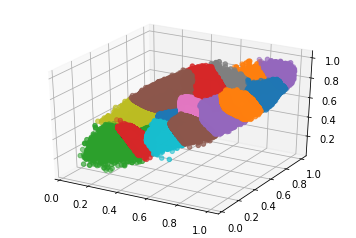

In [28]:
# Visualizing the centroids after obtaining the centroids

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(K):
    ax.scatter(X[np.where(idx == i + 1)][:,0],X[np.where(idx == i + 1)][:,1],X[np.where(idx == i + 1)][:,2],'o',label = 'input data')




In [29]:
#After ﬁnding the top K = 16 colors to represent the image, you can now

# Assign each pixel position to its closest centroid using the findClosestCentroids function. This allows you to represent
# the original image using the centroid assignments of each pixel. Notice that you have signiﬁcantly reduced the number of 
# bits that are required to describe the image. The original image required 24 bits for each one of the 128×128 pixel 
# locations, resulting in total size of 128×128×24 = 393,216 bits. The new representation requires some overhead storage in 
# form of a dictionary of 16 colors, each of which require 24 bits, but the image itself then only requires 4 bits per pixel 
# location. The ﬁnal number of bits used is therefore 16×24(for centroids) + 128×128×4(for pixel representation) = 65,920 bits, which corresponds to compressing the 
# original image by about a factor of 6.


In [30]:
#%% ================= Part 5: Image Compression ======================
#%  In this part of the exercise, you will use the clusters of K-Means to
#%  compress an image. To do this, we first find the closest clusters for
#%  each example. After that, we 

In [31]:
# This will have the index of closest centroids
idx = findClosestCentroids(X , centroids)

# It will take the value of centroid in which that example is present
Xrecovered = centroids[idx - 1]

Xrecovered


array([[0.38771601, 0.42985355, 0.75535171],
       [0.38771601, 0.42985355, 0.75535171],
       [0.38771601, 0.42985355, 0.75535171],
       ...,
       [0.26283704, 0.20317028, 0.34652383],
       [0.26283704, 0.20317028, 0.34652383],
       [0.33485687, 0.27197099, 0.39196848]])

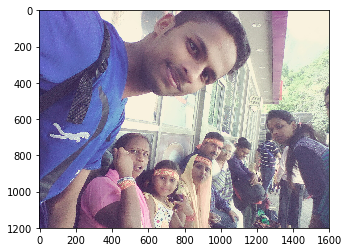

In [32]:
# Original Image
plt.imshow(img)


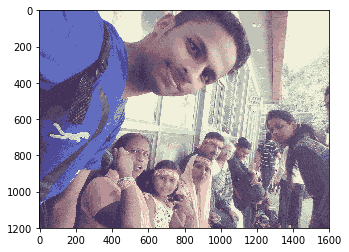

In [33]:
# reshaping it to the (no. of pixel rows,no. of pixel column, 3)
Xrecovered = Xrecovered.reshape(img.shape[0],img.shape[1],3)


#Compressed image
plt.imshow(Xrecovered)

In [34]:
#saving compressed image 
fig.savefig('plot.png')

In [35]:
#Size of original image(in kilo bytes)
import os
os.path.getsize(r'E:\Machine Learning\test.jpg')/1024

745.4541015625

In [36]:
#Size of compressed image(in kilo bytes)

import os
os.path.getsize(r'C:\Users\Dell\Desktop\anaconda\Machine Learning\plot.png')/1024

35.5849609375